# Tutorial-XClone on TNBC1 scRNA-seq

scRNA-seq data

Author: Rongting Huang


Date: 2023-02-06

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xclone
xclone.__version__

import pandas as pd
import numpy as np
import scipy
scipy.__version__

import anndata as an

xclone.pp.efficiency_preview()

import warnings
warnings.filterwarnings('ignore')

(Running XClone 0.3.4)


'0.3.4'

'1.7.0'

[XClone efficiency] multiprocessing cpu total count in your device 112


## load dataset

In [3]:
RDR_adata = xclone.data.tnbc1_rdr()
BAF_adata = xclone.data.tnbc1_baf()

In [4]:
dataset_name = "TNBC1_scRNA"
## output dir
out_dir = "/storage/yhhuang/users/rthuang/xclone/manuscript_biorxiv/TNBC1_scRNA/"

## RDR module

RDR 
Configurations:
KNN_neighbors                  10
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /storage/yhhuang/users/rthuang/xclone/manuscript_biorxiv/TNBC1_scRNA
_plot_suffix                   
_start                         1675679201.7870543
_vector_friendly               True
cell_anno_key                  cluster.pred
dataset_name                   TNBC1_scRNA
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
gene_exp_group                 1
gene_exp_ref_log               True
guide_chr_anno_key             chr_arm
guide_cnv_ratio                None
guide_qt_lst                   [1e-05, 0.96, 0.999]
marker_group_anno_key          cluster.pred
max_iter                       2
min_iter

Trying to set attribute `.var` of view, copying.


[XClone] use marker genes provided by users: 
 ['AC036214.3' 'AC093484.3' 'AL365205.1' 'ATP1A1' 'B2M' 'CD24' 'CRYAB'
 'CST3' 'CTSB' 'CYBA' 'DPYD' 'EMP3' 'EPCAM' 'GSTO1' 'H3F3A' 'HLA-A' 'HNMT'
 'HSP90AB1' 'KRT7' 'MRPL14' 'POLR1C' 'RAB31' 'RPL28' 'TM4SF1' 'TMSB4X'
 'TOMM6' 'TPD52' 'UBB' 'YIPF3' 'ZEB2']
filter_genes_num: 30
used_genes_num: 6403
output anndata is not sparse matrix.
['1', '2', '3', '17']
0 1873
['19', '5', '14', '2']
1 1391
[XClone RDR library ratio fitting] Time used: 0 seconds
[XClone RDR library ratio fitting] Time used: 12 seconds
[XClone RDR library ratio]: checking
max_value: 4.978008632808787
min_value: 0.25581933202911067
qt_0.95_value: 3.625555619193634
qt_0.05_value: 0.5104424008672037
[XClone RDR library ratio]: clipping
[XClone RDR library ratio]: checking
max_value: 4.978008632808787
min_value: 0.25581933202911067
qt_0.95_value: 3.625555619193634
qt_0.05_value: 0.5104424008672037


Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


[XClone RDR gene dispersion fitting] Time used: 38 seconds
[XClone RDR gene-specific dispersion]: checking
max_value: 52.8298388811891
min_value: 3.330895127931041e-72
qt_0.95_value: 4.162699785667388
qt_0.05_value: 0.04633867037721354
remove no GLM results genes num: 0
remove inf dispersion genes num: 0
[XClone RDR library ratio]: clipping
[XClone RDR gene-specific dispersion]: checking
max_value: 2.9108165471046656
min_value: 0.0148038128518171
qt_0.95_value: 2.9108165471046656
qt_0.05_value: 0.04633867037721354
[XClone hint] RDR_base_file and bulk_file saved in /storage/yhhuang/users/rthuang/xclone/manuscript_biorxiv/TNBC1_scRNA/data/.
[XClone] RDR CNV states chrs guiding(copy loss, copy neutral, copy gain): ['19q', '3p', '8q']
CNV loss:  0.6417753762360628
CNV neutral:  1.2352664958770498
CNV gain:  2.908067888607353
[XClone] RDR CNV states ratio guiding(copy loss, copy neutral, copy gain): [0.64177538 1.2352665  2.90806789]
expression_brk [-0.6898304  5.8300295]
[XClone] CNV_optim

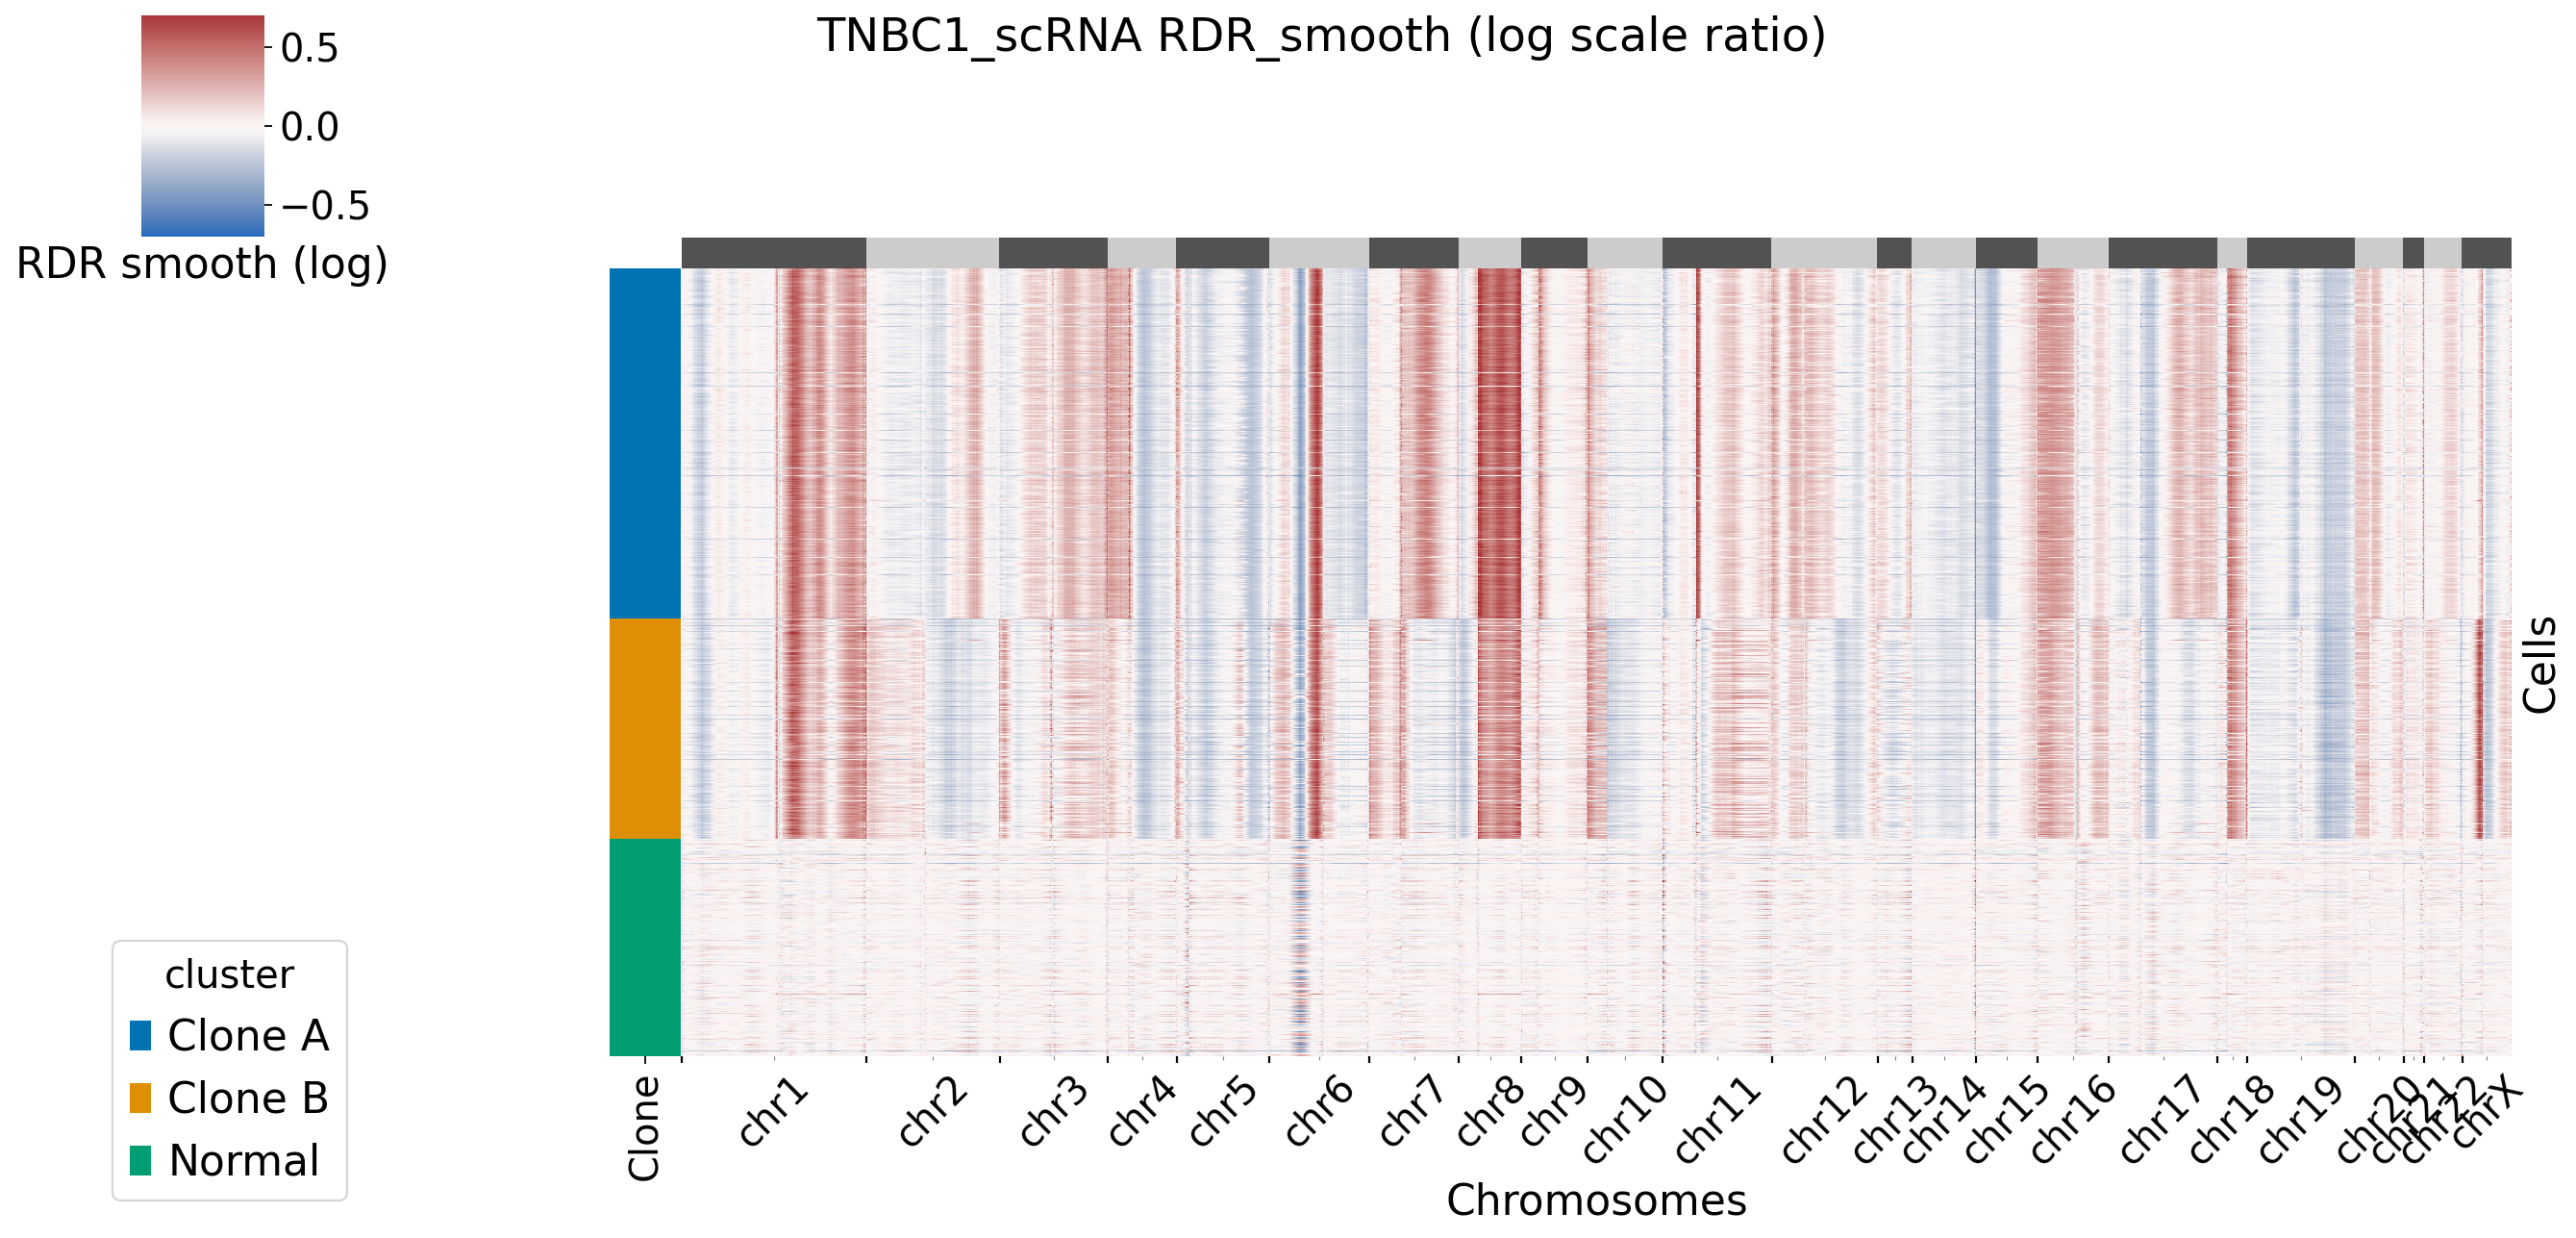

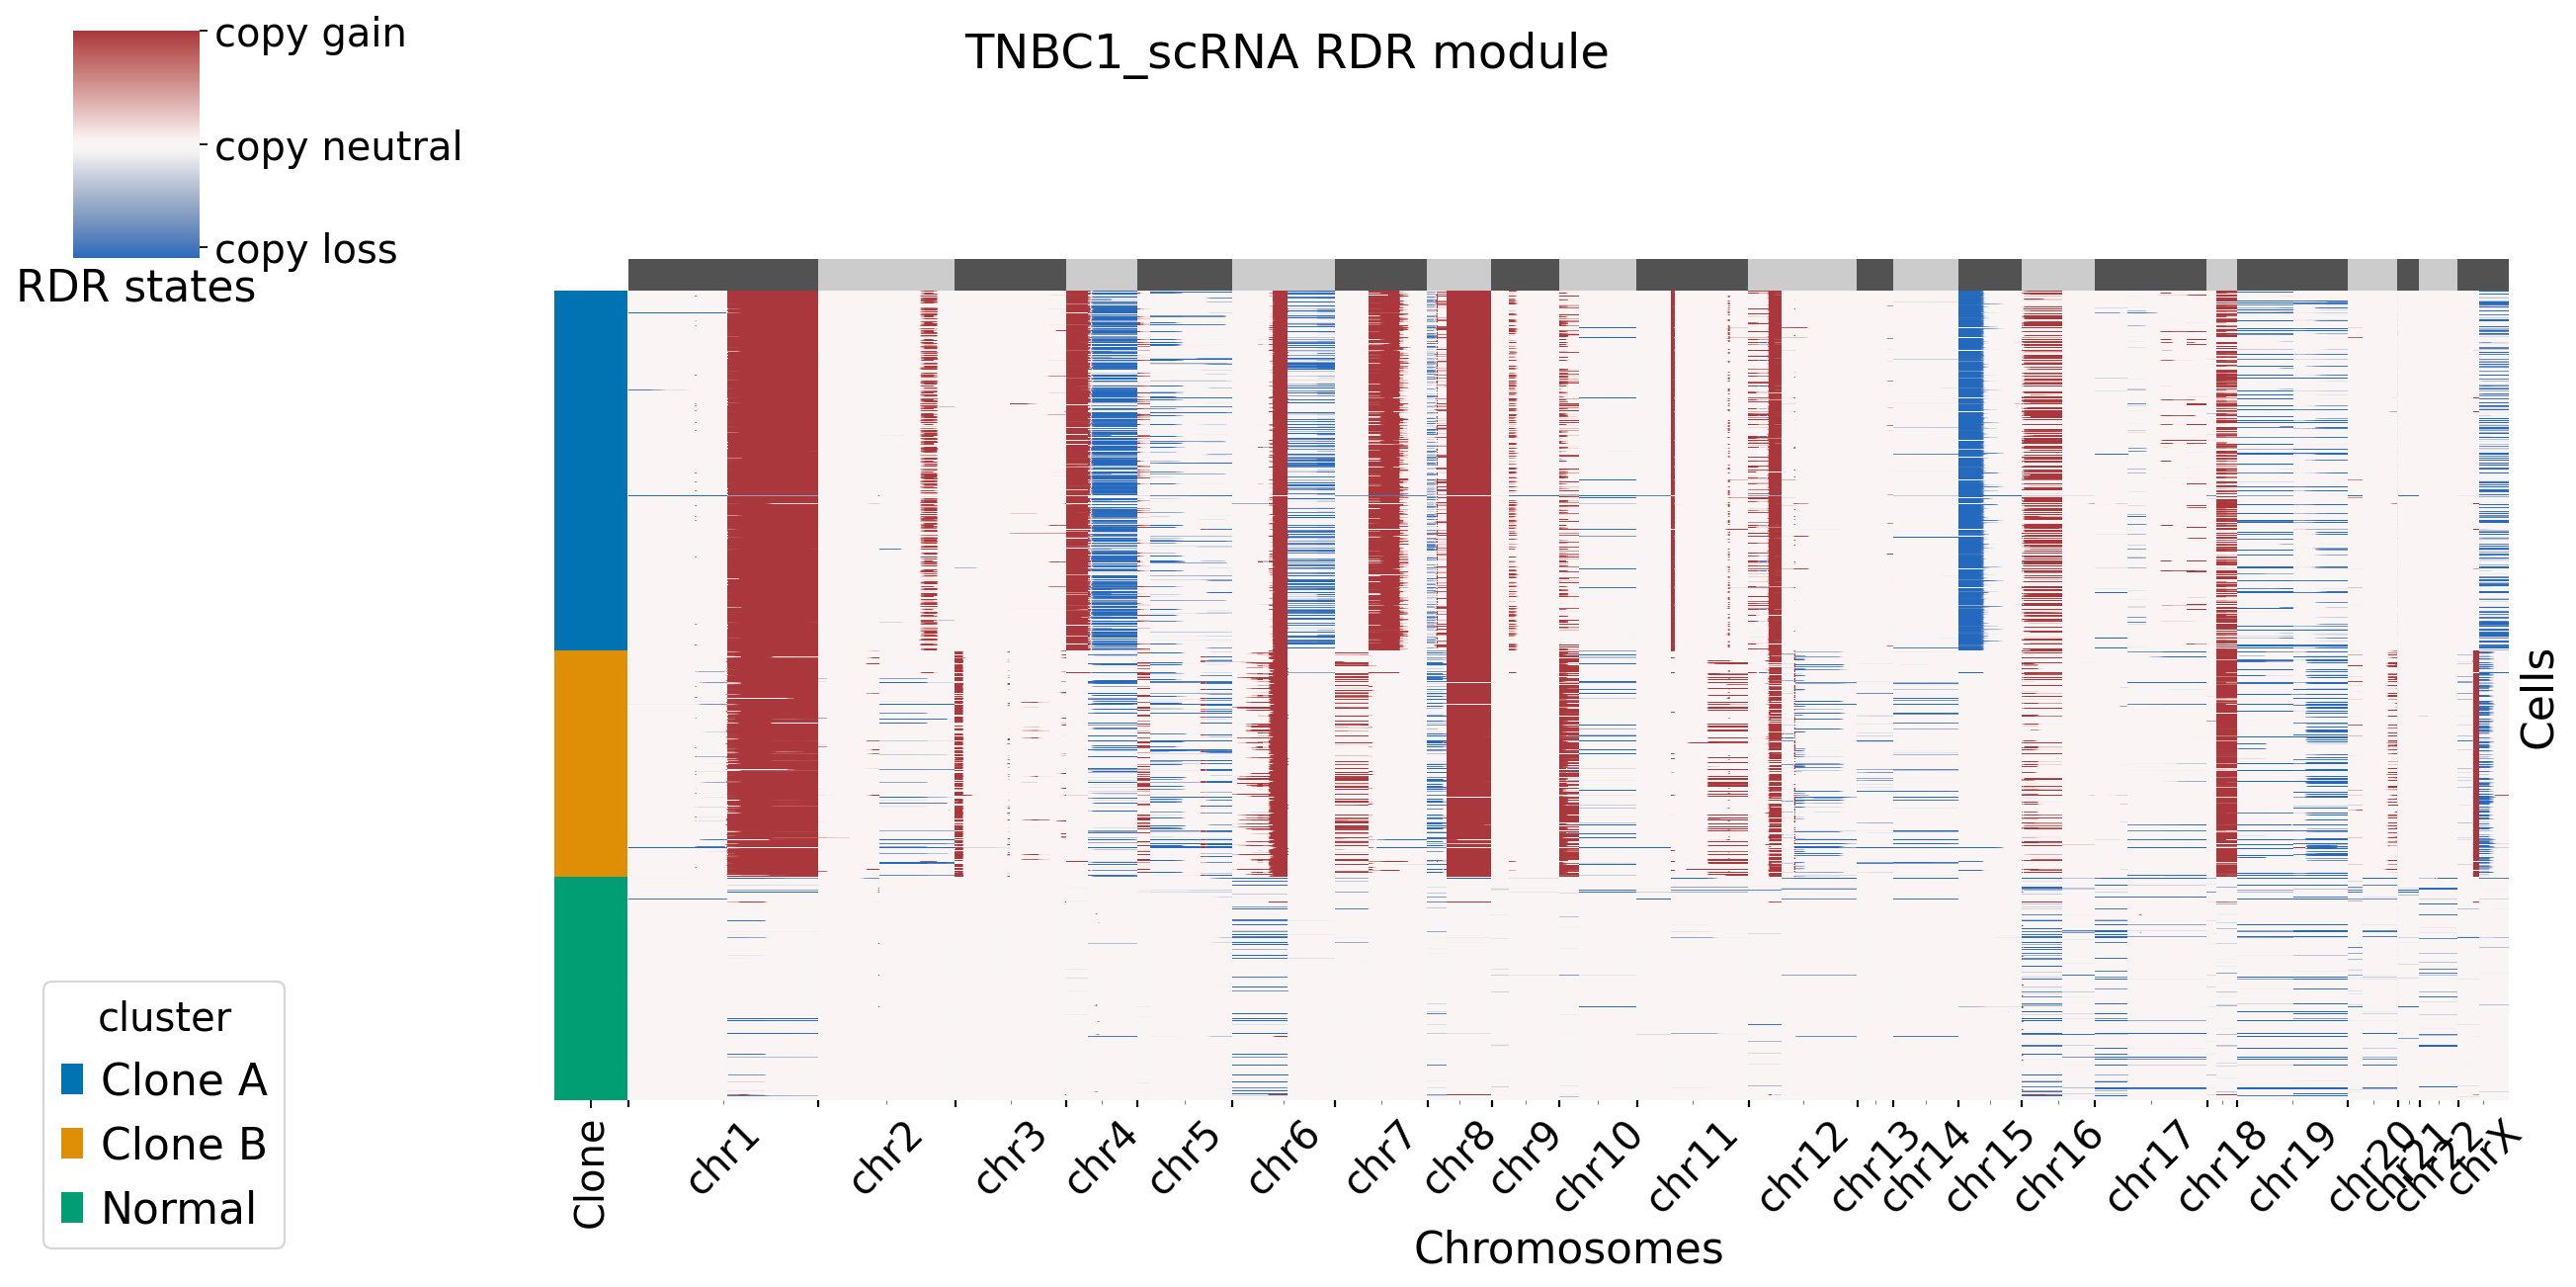

In [5]:
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "RDR")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"
xconfig.filter_ref_ave = 0.5
xconfig.smart_transform = False
xconfig.top_n_marker = 15
xconfig.marker_group_anno_key = "cluster.pred"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"

xconfig.guide_qt_lst = [1e-05, 0.96, 0.999]
xconfig.display()

RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)

In [6]:
RDR_Xdata.var

GeneName           GeneID chr      start       stop arm chr_arm    band  \
26        HES4  ENSG00000188290   1     998962    1000172   p      1p  p36.33   
27       ISG15  ENSG00000187608   1    1001138    1014541   p      1p  p36.33   
38     TNFRSF4  ENSG00000186827   1    1211326    1214138   p      1p  p36.33   
39        SDF4  ENSG00000078808   1    1216908    1232031   p      1p  p36.33   
43      UBE2J2  ENSG00000160087   1    1253909    1273885   p      1p  p36.33   
...        ...              ...  ..        ...        ...  ..     ...     ...   
33348     MPP1  ENSG00000130830   X  154778684  154821007   q      Xq     q28   
33350       F8  ENSG00000185010   X  154835788  155026940   q      Xq     q28   
33353   FUNDC2  ENSG00000165775   X  155025980  155060303   q      Xq     q28   
33355    MTCP1  ENSG00000214827   X  155061622  155147937   q      Xq     q28   
33357     VBP1  ENSG00000155959   X  155197007  155239817   q      Xq     q28   

        ref_avg  dispersion  gene_dispersion_bse  dispersion_capped  
26     0.611296    4.689895                  NaN           2.910817  
27     6.817276    3.149116                  NaN           2.910817  
38     0.637874    5.935623                  NaN           2.910817  
39     1.408638    0.230897                  NaN           0.230897  
43     0.624585    0.144445                  NaN           0.144445  
...         ...         ...                  ...                ...  
33348  1.614618    0.866876                  NaN           0.866876  
33350  0.554817    0.464328                  NaN           0.464328  
33353  0.860465    0.109098                  NaN           0.109098  
33355  0.873754    0.168195                  NaN           0.168195  
33357  0.750831    0.136160                  NaN           0.136160  

[6402 rows x 12 columns]

## BAF moudle

BAF 
Configurations:
BAF_denoise                    True
BAF_states_num                 3
CNV_N_components               3
KNN_neighbors                  10
RDR_file                       None
WMA_smooth_key                 chr_arm
WMA_window_size                101
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /storage/yhhuang/users/rthuang/xclone/manuscript_biorxiv/TNBC1_scRNA
_plot_suffix                   
_start                         1675679393.2319303
_vector_friendly               True
bin_nproc                      20
cell_anno_key                  cluster.pred
concentration                  100
concentration_lower            20
concentration_upper            100
dataset_name                   TNBC1_scRNA
exclude_XY                     False
extreme_count_cap              False
feature_mode                   GENE
file_format_data               h5ad
file_format_figs               pdf
ge

... storing 'bin_stop_arm' as categorical
... storing 'bin_stop_chr_arm' as categorical
... storing 'bin_stop_band' as categorical


[XClone hint] BAF_base_file and merged_file saved in /storage/yhhuang/users/rthuang/xclone/manuscript_biorxiv/TNBC1_scRNA/data/.
[XClone get_CNV_states] time_used: 14.61seconds
states used: [0.28692468 0.50714286 0.72361922]
.....
[XClone] specific Center states used.
[XClone]: validated probability, all finite.
cal emm prob time 0 seconds
normalize the input emm_prob_log
normalized emm_prob_log
generate new layer key value: bin_phased_BAF_specific_center_emm_prob_log_KNN
[BAF smoothing] time_used: 0.08seconds
Cell level: no filtering emm_prob
Gene level: no filtering emm_prob
[XClone] multiprocessing for each brk item
nproc: 80
[XClone HMM smoothing] Time used: 3 seconds
[[0.06717796]
 [0.59503366]]
[XClone hint] BAF_final_file saved in /storage/yhhuang/users/rthuang/xclone/manuscript_biorxiv/TNBC1_scRNA/data/.


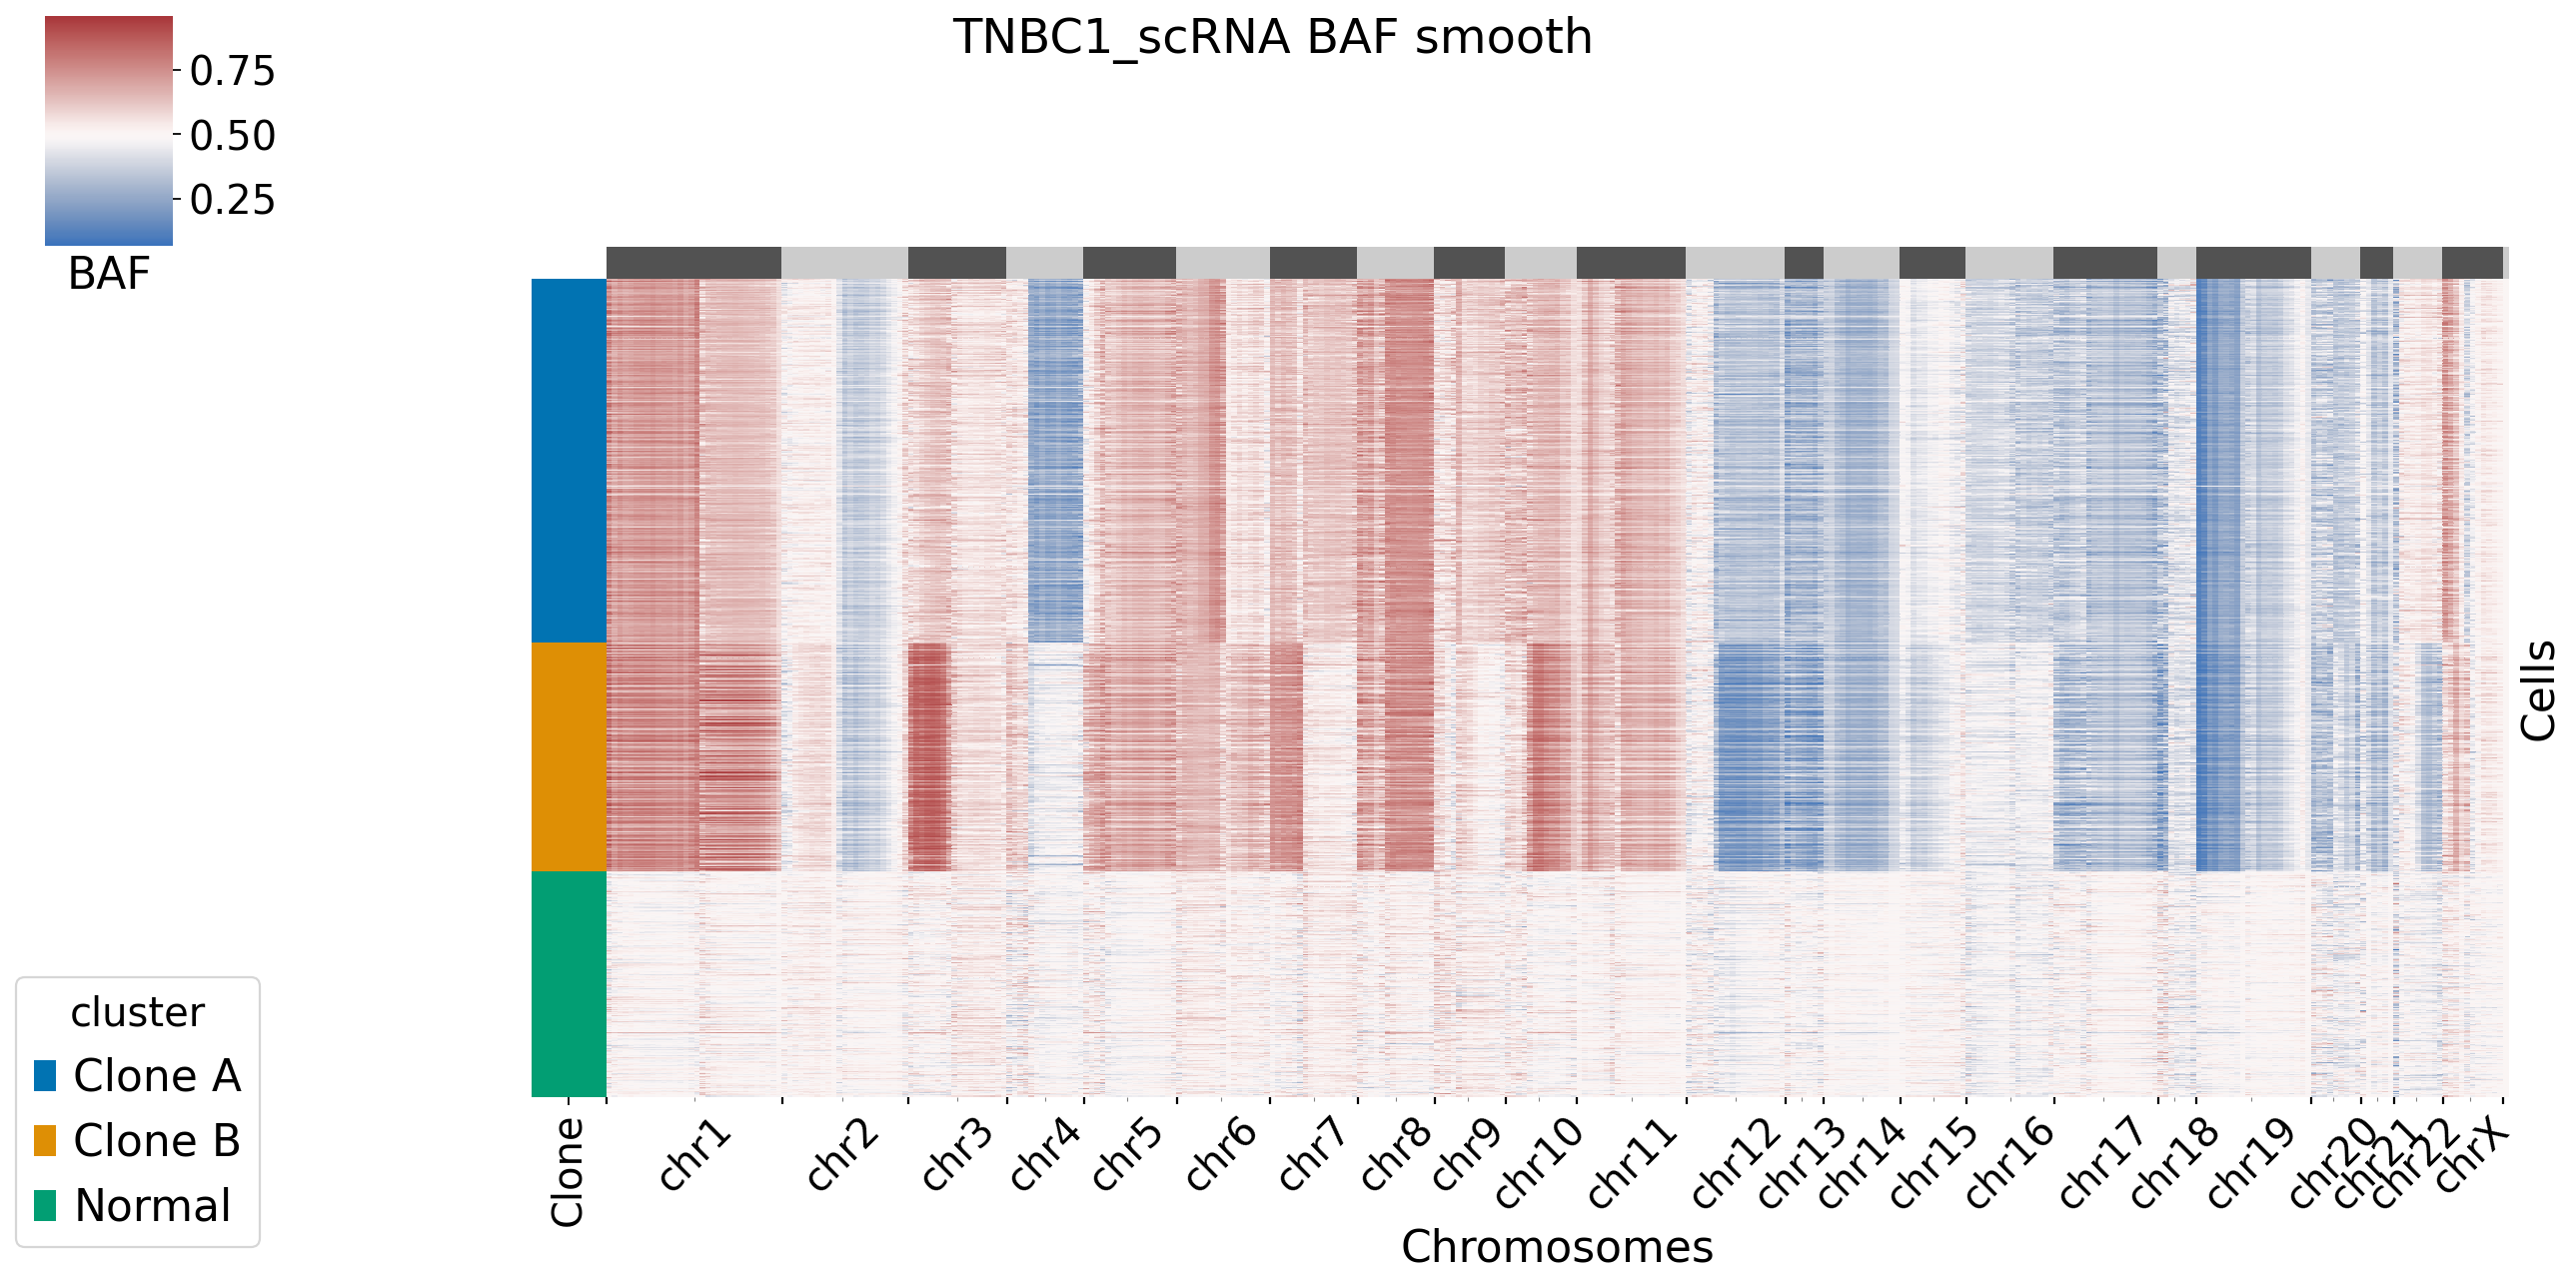

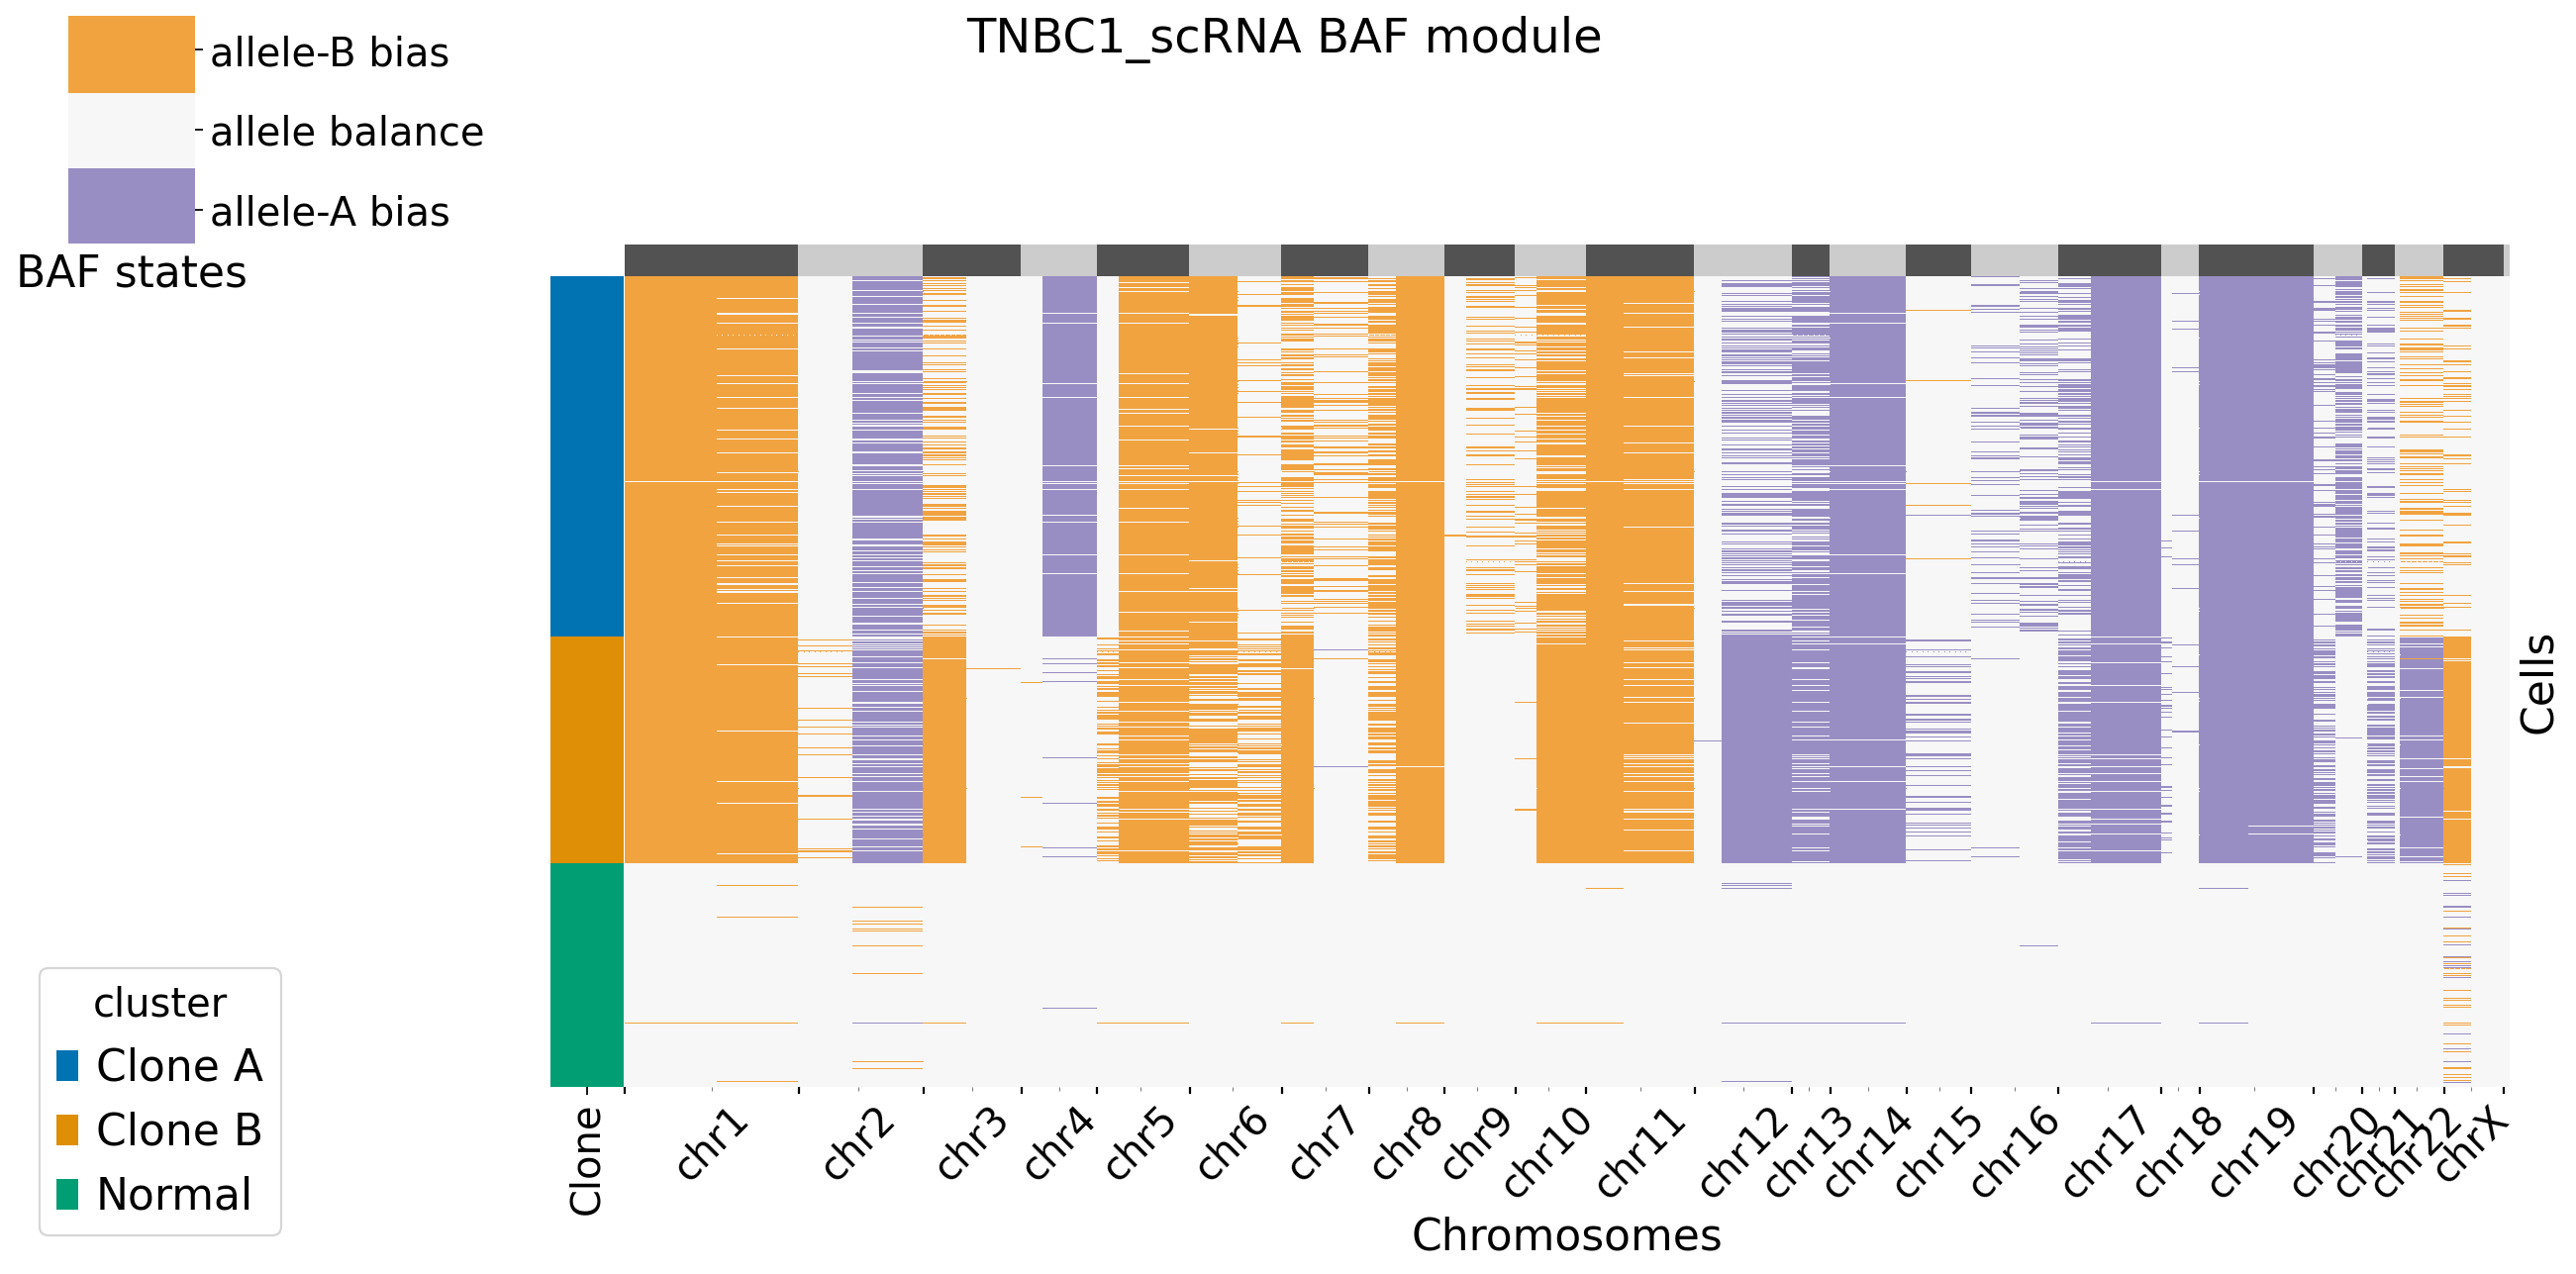

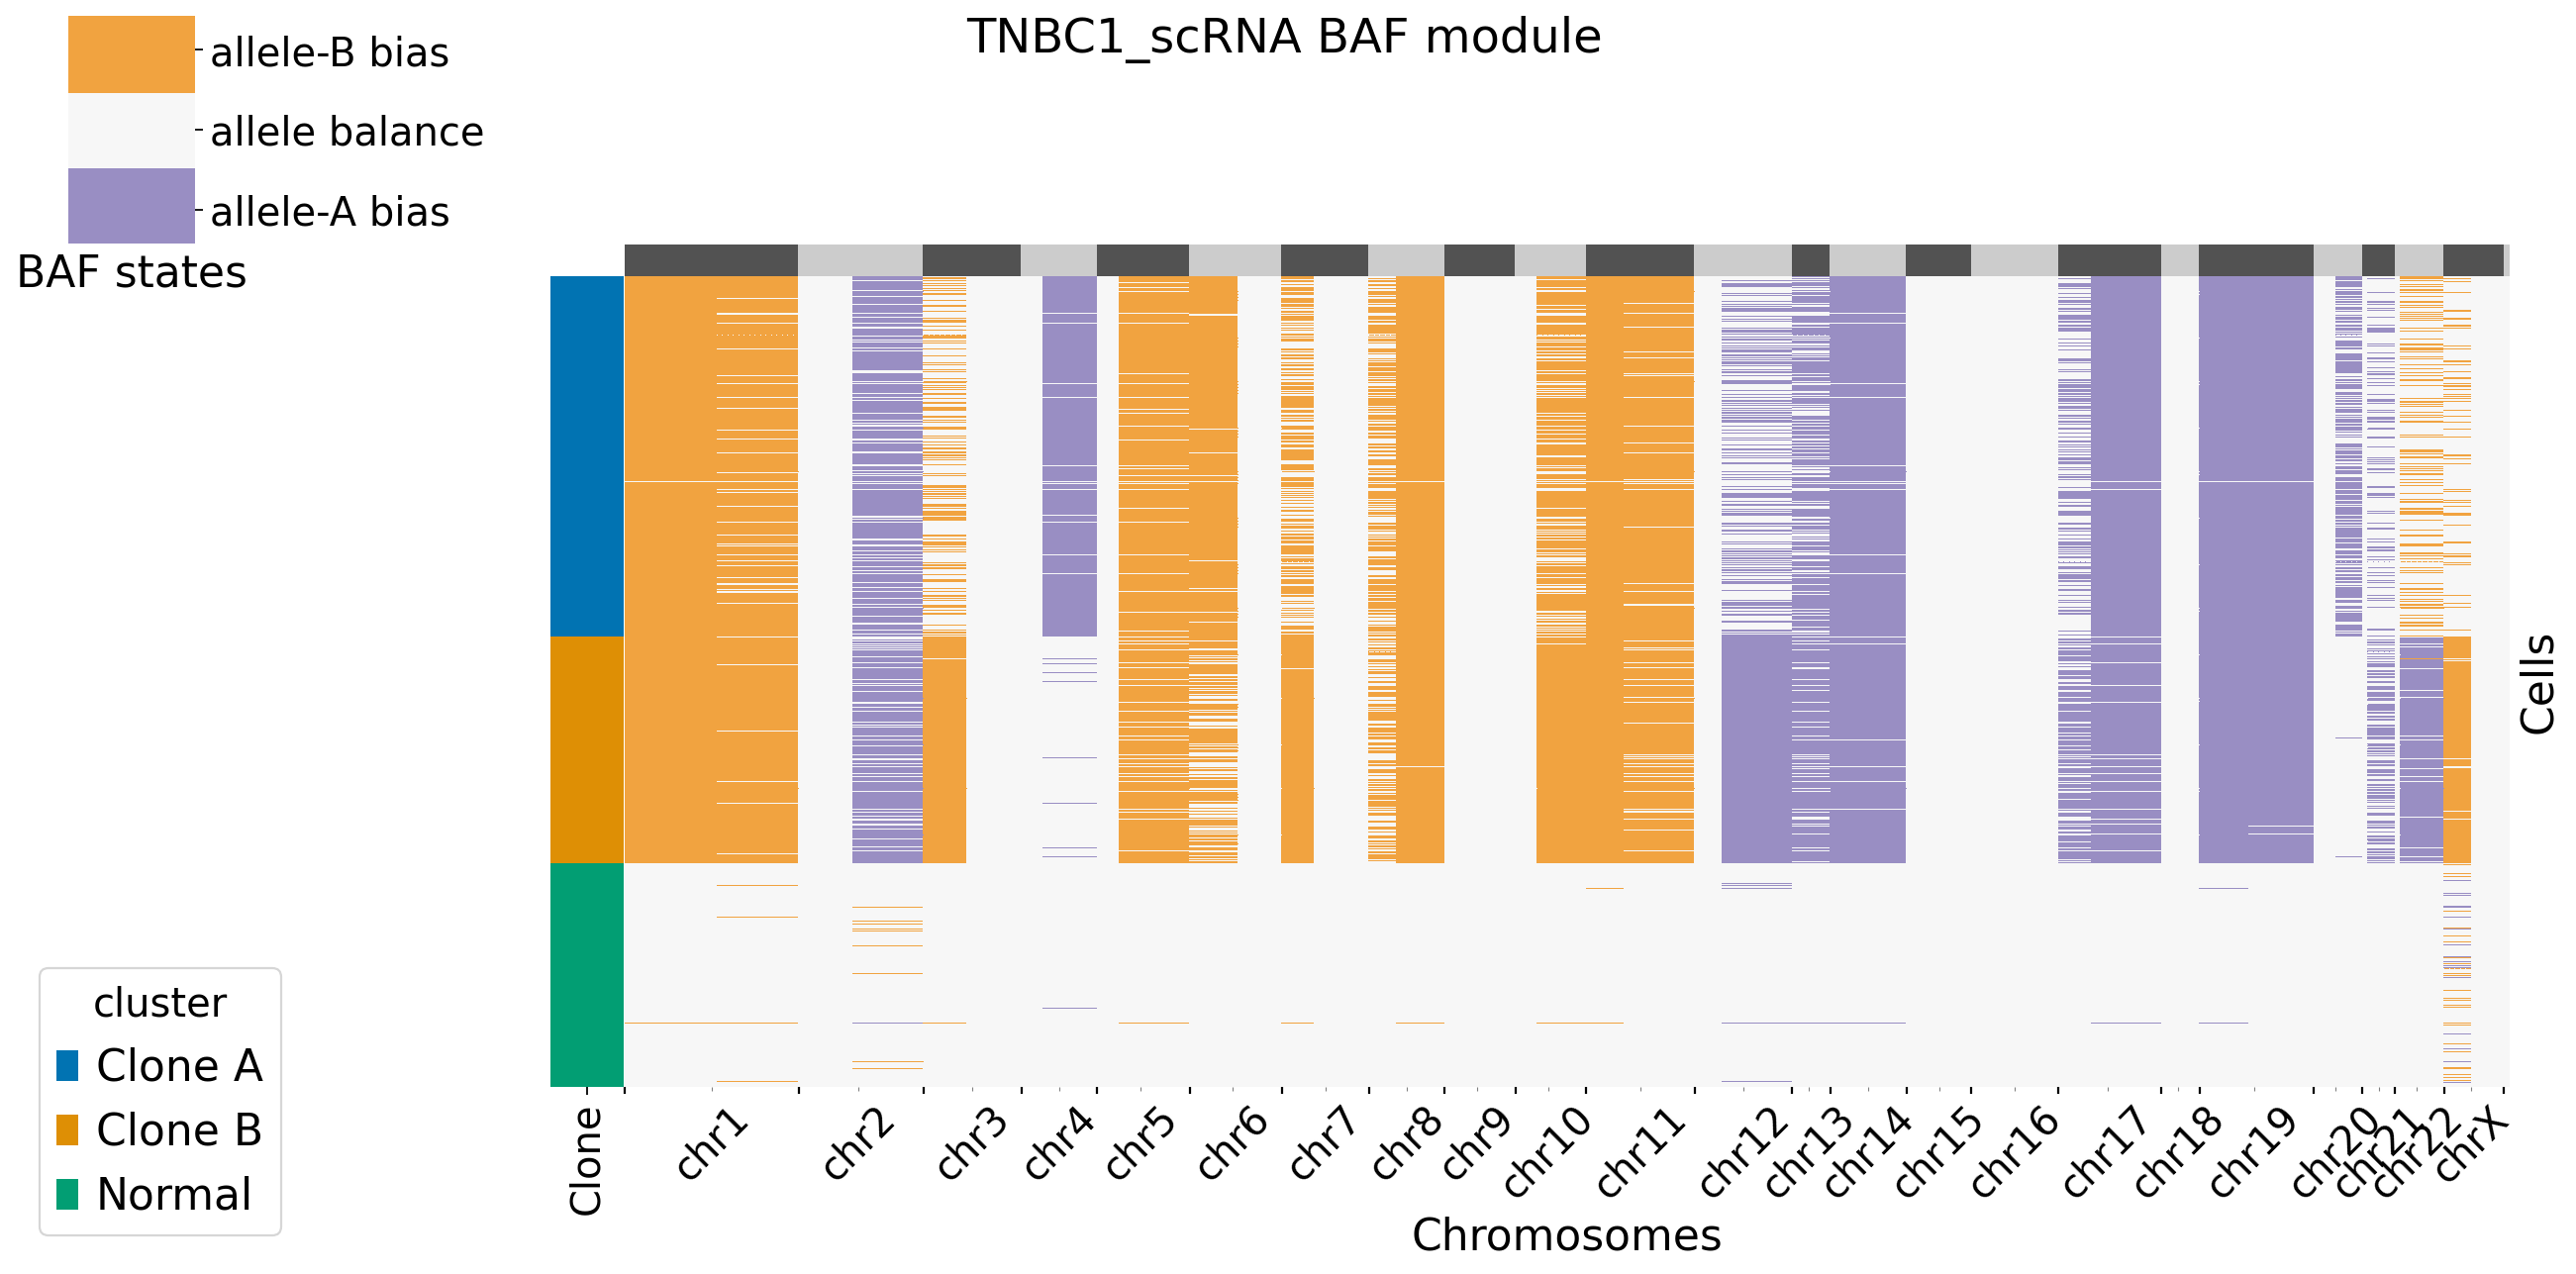

In [7]:
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "BAF")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"
xconfig.start_prob = np.array([0.2, 0.6, 0.2])
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"

xconfig.display()

BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)

In [8]:
RDR_Xdata.var

GeneName           GeneID chr      start       stop arm chr_arm    band  \
26        HES4  ENSG00000188290   1     998962    1000172   p      1p  p36.33   
27       ISG15  ENSG00000187608   1    1001138    1014541   p      1p  p36.33   
38     TNFRSF4  ENSG00000186827   1    1211326    1214138   p      1p  p36.33   
39        SDF4  ENSG00000078808   1    1216908    1232031   p      1p  p36.33   
43      UBE2J2  ENSG00000160087   1    1253909    1273885   p      1p  p36.33   
...        ...              ...  ..        ...        ...  ..     ...     ...   
33348     MPP1  ENSG00000130830   X  154778684  154821007   q      Xq     q28   
33350       F8  ENSG00000185010   X  154835788  155026940   q      Xq     q28   
33353   FUNDC2  ENSG00000165775   X  155025980  155060303   q      Xq     q28   
33355    MTCP1  ENSG00000214827   X  155061622  155147937   q      Xq     q28   
33357     VBP1  ENSG00000155959   X  155197007  155239817   q      Xq     q28   

        ref_avg  dispersion  gene_dispersion_bse  dispersion_capped  
26     0.611296    4.689895                  NaN           2.910817  
27     6.817276    3.149116                  NaN           2.910817  
38     0.637874    5.935623                  NaN           2.910817  
39     1.408638    0.230897                  NaN           0.230897  
43     0.624585    0.144445                  NaN           0.144445  
...         ...         ...                  ...                ...  
33348  1.614618    0.866876                  NaN           0.866876  
33350  0.554817    0.464328                  NaN           0.464328  
33353  0.860465    0.109098                  NaN           0.109098  
33355  0.873754    0.168195                  NaN           0.168195  
33357  0.750831    0.136160                  NaN           0.136160  

[6402 rows x 12 columns]

In [9]:
BAF_merge_Xdata.var

chr      start       stop arm chr_arm    band  gene1_stop bin_stop_arm  \
0       1      29554    2530245   p      1p  p36.33       31109            p   
100     1    2530064    8434838   p      1p  p36.32     2547460            p   
200     1    8805860   13179464   p      1p  p36.23     8807051            p   
300     1   13196330   18486126   p      1p  p36.21    13201409            p   
400     1   18631006   23838620   p      1p  p36.13    18748866            p   
...    ..        ...        ...  ..     ...     ...         ...          ...   
32996   X  109623700  128052398   q      Xq     q23   109625172            q   
33096   X  128323620  140772679   q      Xq     q25   128600468            q   
33196   X  140782405  153689010   q      Xq   q27.1   140784871            q   
33296   X  153688099  156016837   q      Xq     q28   153696593            q   
33372   Y    2786855   25733388   p      Yp   p11.2     2787699            q   

      bin_stop_chr_arm bin_stop_band  bin_idx  bin_idx_cum  \
0                   1p        p36.32        0            0   
100                 1p        p36.23        1            1   
200                 1p        p36.21        2            2   
300                 1p        p36.13        3            3   
400                 1p        p36.11        4            4   
...                ...           ...      ...          ...   
32996               Xq           q25        7          342   
33096               Xq         q27.1        8          343   
33196               Xq           q28        9          344   
33296               Xq           q28       10          345   
33372               Yq        q11.23        0          346   

                                            GeneName_lst  \
0      MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309....   
100    AL139246.5,TNFRSF14-AS1,TNFRSF14,AL139246.3,FA...   
200    AL357552.2,ENO1,ENO1-AS1,CA6,SLC2A7,SLC2A5,GPR...   
300    PRAMEF13,PRAMEF18,PRAMEF5,PRAMEF8,PRAMEF33,PRA...   
400    PAX7,TAS1R2,AL080251.1,ALDH4A1,IFFO2,UBR4,AL03...   
...                                                  ...   
32996  KCNE5,ACSL4,TMEM164,AMMECR1,RTL9,CHRDL1,PAK3,C...   
33096  AL442647.1,SMARCA1,OCRL,APLN,XPNPEP2,SASH3,ZDH...   
33196  CDR1,AL078639.1,AL451048.1,SPANXB1,AC234778.2,...   
33296  SLC6A8,BCAP31,ABCD1,U52111.1,PLXNB3,SRPK3,IDH3...   
33372  SRY,RPS4Y1,AC006157.1,ZFY,ZFY-AS1,LINC00278,TG...   

                                              GeneID_lst  bin_genes_cnt  \
0      ENSG00000243485,ENSG00000237613,ENSG0000018609...            818   
100    ENSG00000272449,ENSG00000238164,ENSG0000015787...            870   
200    ENSG00000228423,ENSG00000074800,ENSG0000023067...            809   
300    ENSG00000279169,ENSG00000279804,ENSG0000027060...            860   
400    ENSG00000009709,ENSG00000179002,ENSG0000025527...            756   
...                                                  ...            ...   
32996  ENSG00000176076,ENSG00000068366,ENSG0000015760...            731   
33096  ENSG00000225689,ENSG00000102038,ENSG0000012212...            743   
33196  ENSG00000184258,ENSG00000281508,ENSG0000022926...            774   
33296  ENSG00000130821,ENSG00000185825,ENSG0000010198...            513   
33372  ENSG00000184895,ENSG00000129824,ENSG0000027884...            718   

       ref_BAF_phased  
0            0.507143  
100          0.517442  
200          0.520401  
300          0.534310  
400          0.553076  
...               ...  
32996        0.501661  
33096        0.483389  
33196        0.495017  
33296        0.503322  
33372        0.500000  

[347 rows x 16 columns]

In [10]:
flag = ~(BAF_merge_Xdata.var["chr"] == "Y")

BAF_merge_Xdata = BAF_merge_Xdata[:, flag]

## Combine module

Combine 
Configurations:
BAF_denoise                    True
KNN_neighbors                  10
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /storage/yhhuang/users/rthuang/xclone/manuscript_biorxiv/TNBC1_scRNA
_plot_suffix                   
_start                         1675679698.4749384
_vector_friendly               True
cell_anno_key                  cluster.pred
copygain_correct               False
copygain_correct_mode          1
copyloss_correct               True
copyloss_correct_mode          1
dataset_name                   TNBC1_scRNA
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
merge_loh                      True
merge_loss                     True
module                         Combine
outdir                         /storage/yhhuang/users/rthuang/xclone/manuscript_biorxiv/TNBC1_scRNA
plot_cell_anno_key             clus

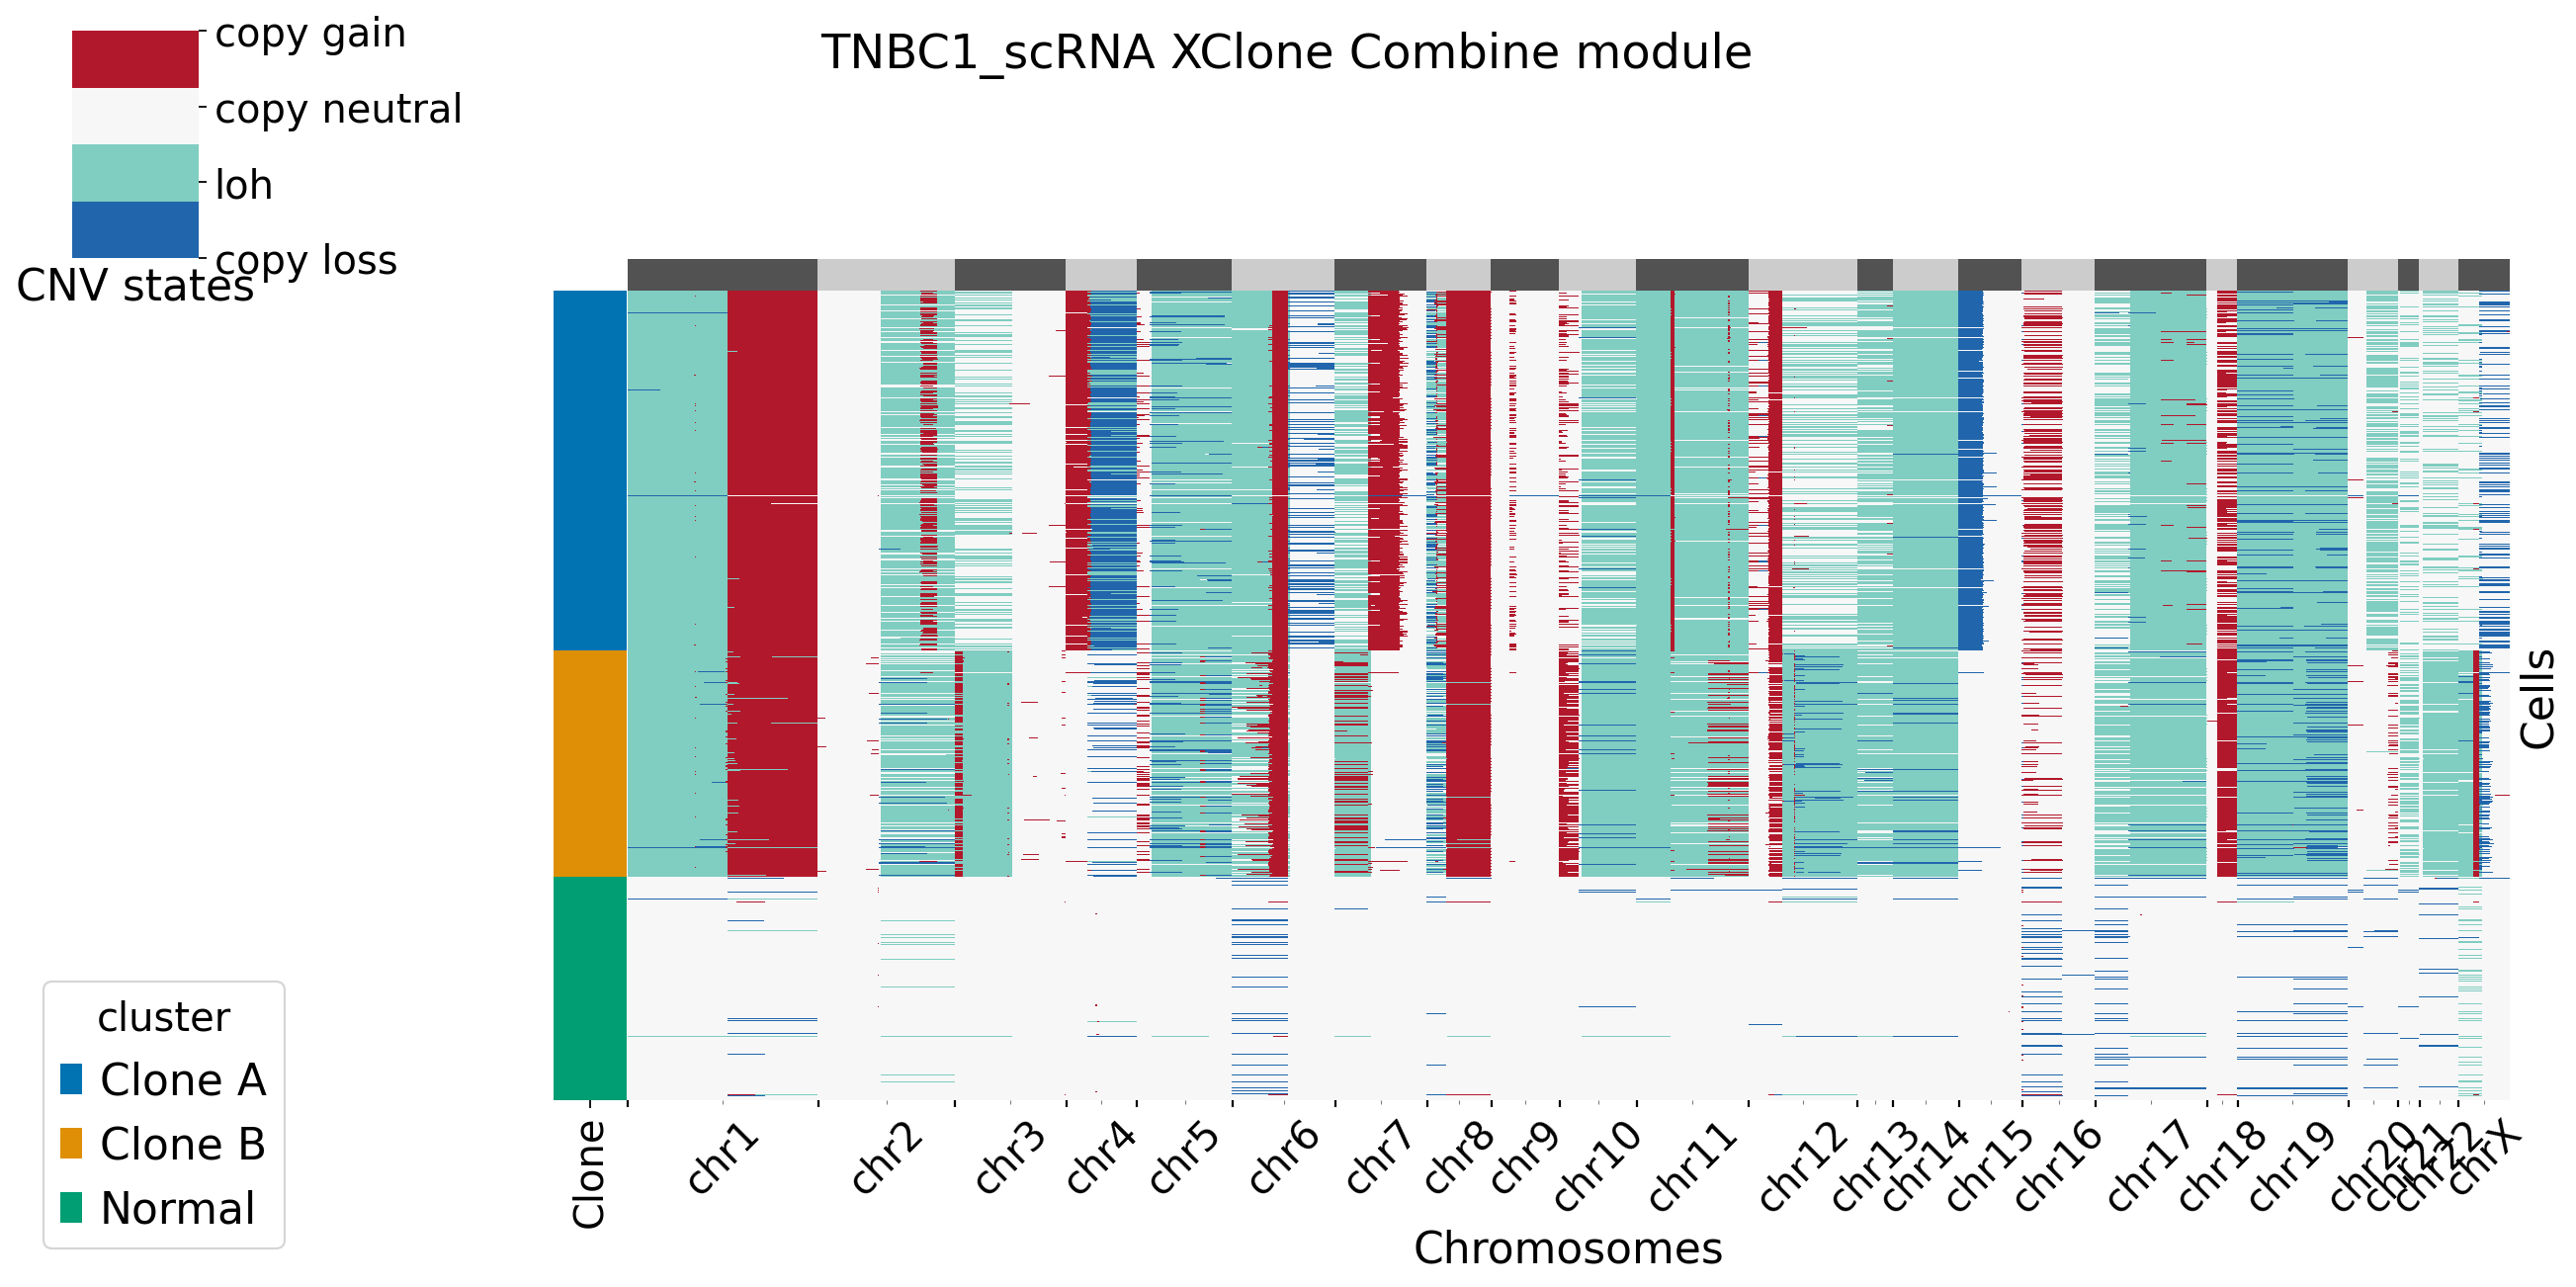

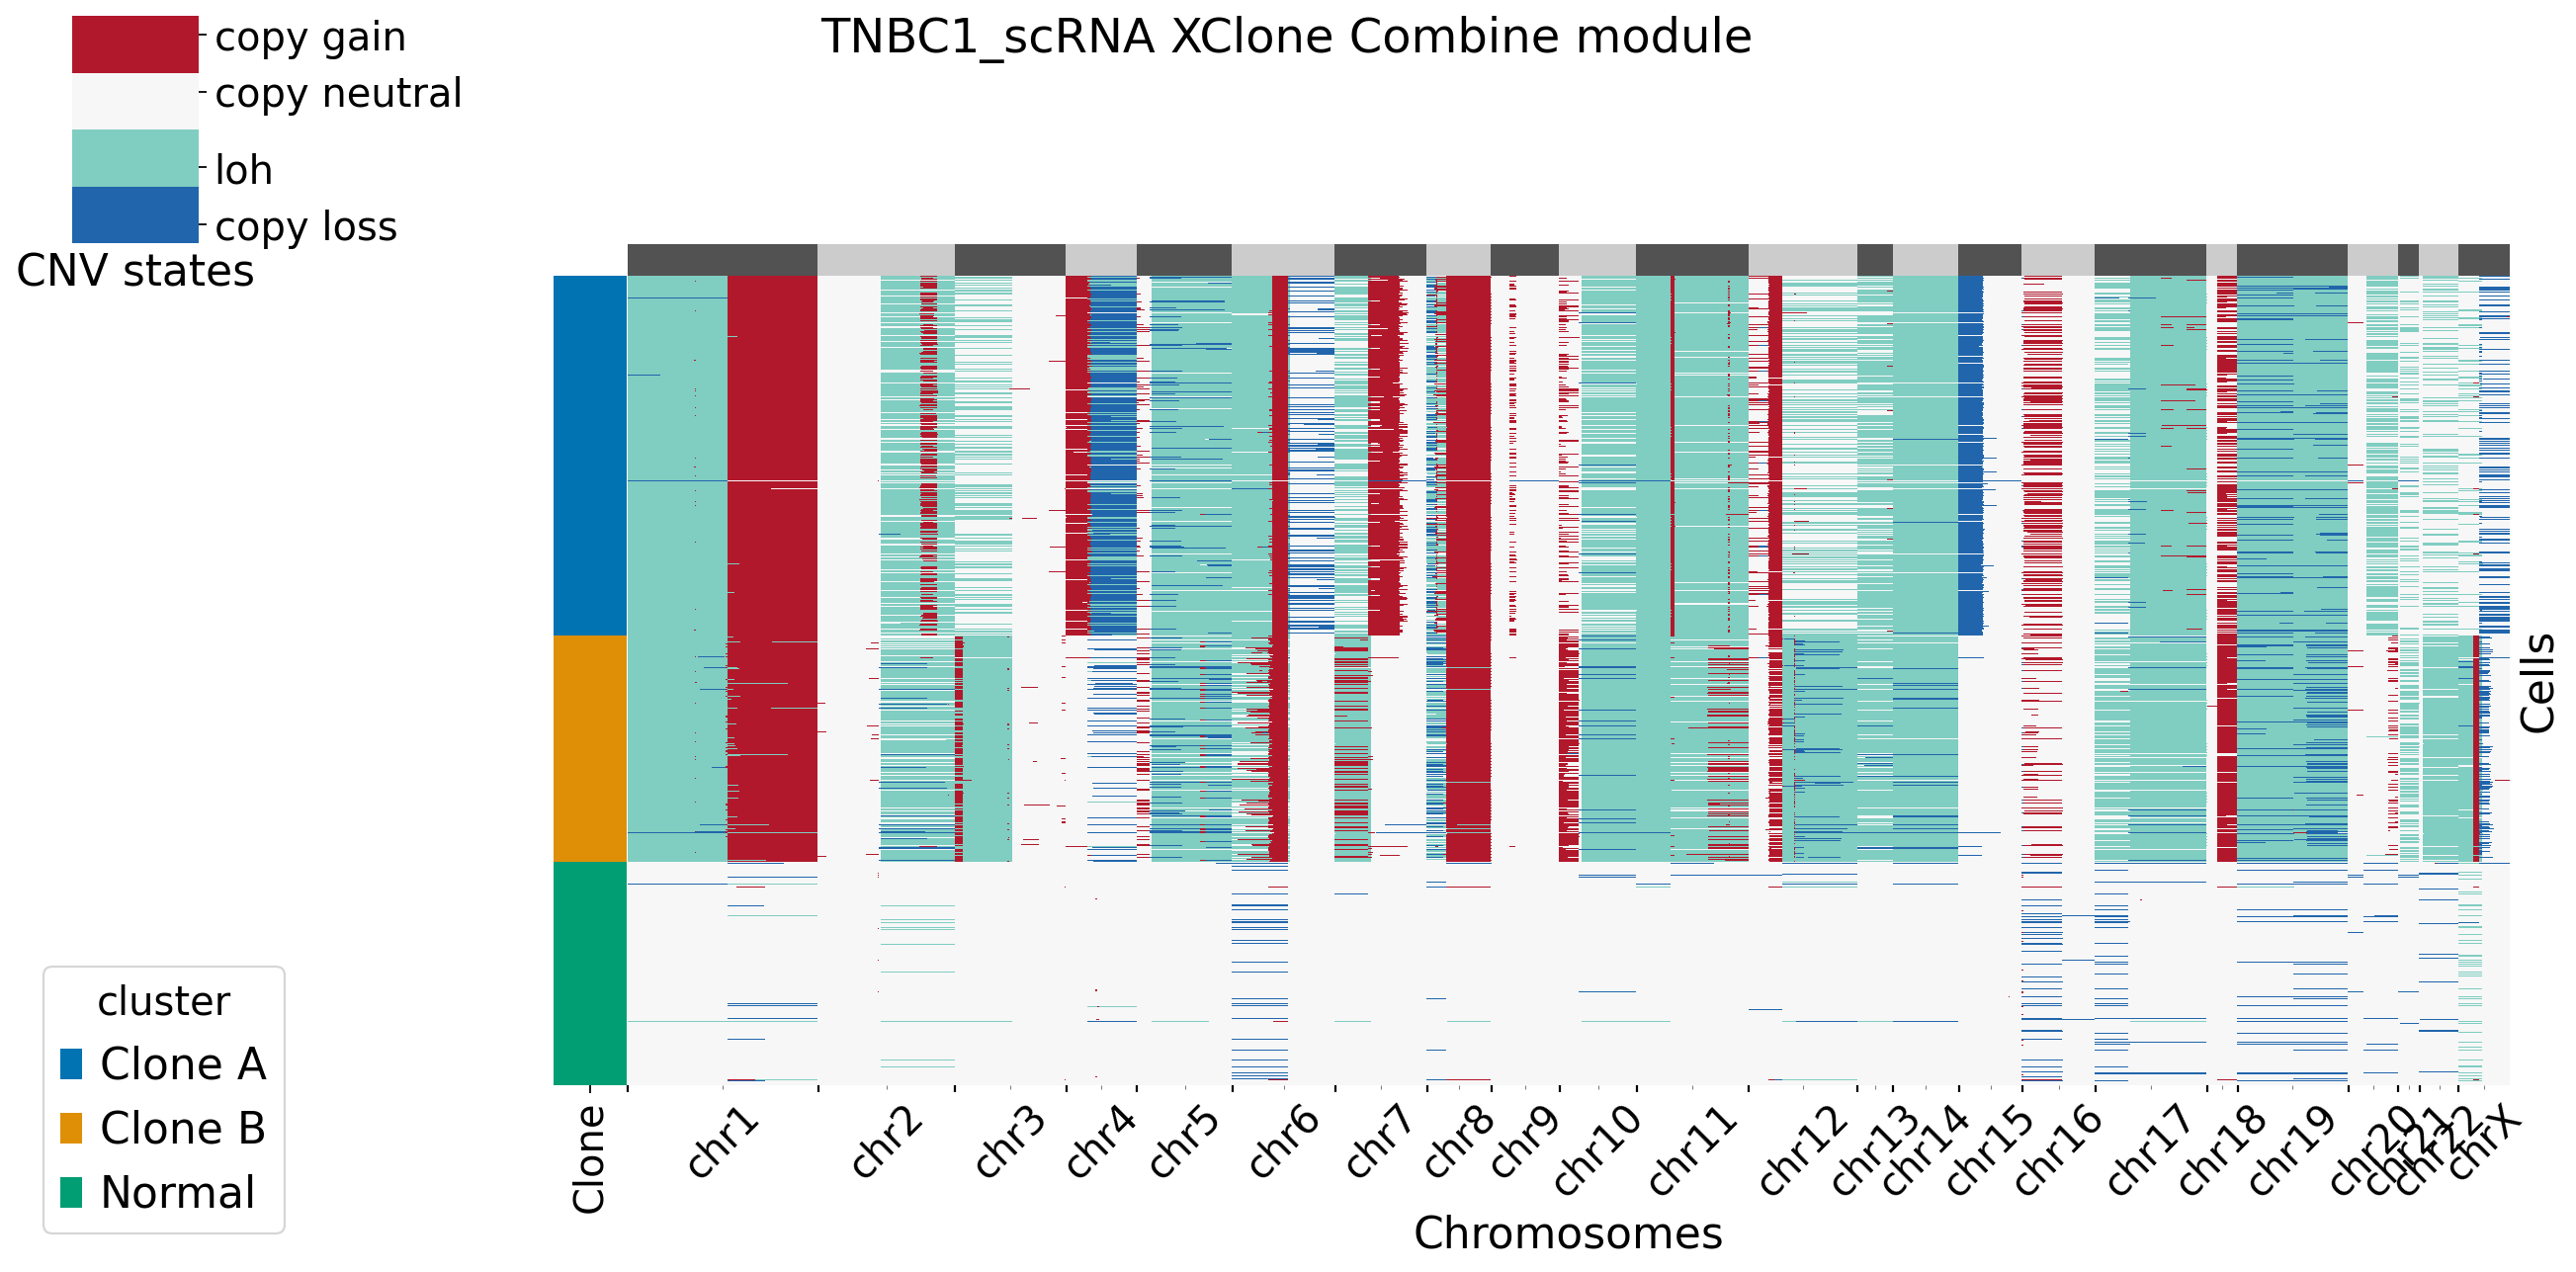

AnnData object with n_obs × n_vars = 1097 × 6402
    obs: 'copykat.pred', 'cluster.pred', 'cluster', 'mit_clone_id', 'confident', 'tumor', 'copykat', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped', 'counts_ratio'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse', 'dispersion_capped', 'gene_index'
    uns: 'data_mode', 'data_notes', 'genome_mode', 'log', 'rank_marker_genes', 'fit_dispersion_removed_genes', 'dispersion_base_celltype', 'pca', 'neighbors', 'chr_dict', 'guide_CNV_chrs_use_layers', 'guide_CNV_chrs_use_anno_key', 'ref_log_expression_brk', 'group_genes', 'CNV_ratio', 'Logliklihood'
    obsm: 'select_chr_index', 'X_pca'
    varm: 'PCs'
    layers: 'raw_expr', 'raw_ratio', 'ref_normalized', 'expected', 'WMA_smoothed', 'RDR_smooth', 'emm_prob_log', 'emm_prob_log_noHMM', 'emm_prob_noHMM', 'posterior_mtx', 'posterior_mtx_log'

In [12]:
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir

xconfig.cell_anno_key = "cluster.pred"
xconfig.ref_celltype = "N"

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cluster"

## add BAF Denoise
xconfig.BAF_denoise = True
xconfig.display()

xclone.model.run_combine(RDR_Xdata,
                         BAF_merge_Xdata,
                         verbose = True,
                         run_verbose = True,
                         config_file = xconfig)